<a href="https://colab.research.google.com/github/loguansiang/fyp/blob/main/CNN_window_method_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:

url = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
df = pd.read_csv(url)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [4]:
df = df['Close']



In [5]:
df

Date
2020-08-14    0.065645
2020-08-15    0.050964
2020-08-16    0.060847
2020-08-17    0.053999
2020-08-18    0.051700
                ...   
2022-04-13    2.869923
2022-04-14    2.780882
2022-04-15    2.803639
2022-04-16    2.822680
2022-04-17    2.790278
Name: Close, Length: 612, dtype: float64

In [6]:
array = df.values.reshape(df.shape[0],1)
scaler = MinMaxScaler()
array = scaler.fit_transform(array)
dataframe= df.values.reshape(df.shape[0],1)

In [7]:
train_size = int(len(array) * 0.67)
test_size = len(array) - train_size
train, test = array[0:train_size,:], array[train_size:len(array),:]
print(len(train), len(test))

410 202


In [8]:
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [9]:
# reshape into X=t and Y=t+1
look_back =3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [11]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

In [13]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(7)
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, look_back)))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(105, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY,epochs=100,batch_size=32)
model.summary()

Epoch 1/100
13/13 [==============================] - 1s 8ms/step - loss: 4.6918e-04
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 5.7570e-05
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 3.9021e-05
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 3.2519e-05
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 2.7391e-05
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 2.6623e-05
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 2.7492e-05
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 2.4921e-05
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 2.5577e-05
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 2.6056e-05
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 2.5524e-05
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.60 RMSE


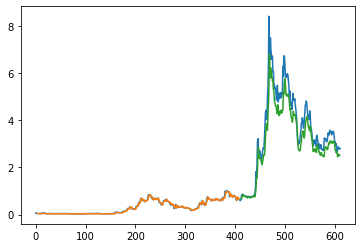

In [15]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(array)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(array)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(array)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(array))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()